<a href="https://colab.research.google.com/github/Paolino1994/Vision-por-computadora/blob/main/TP2/TP2_VPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from scipy.ndimage import gaussian_filter
from scipy import misc

In [5]:
def create_gauss_filter(h, w, k_size,sigma):
  kernel = cv.getGaussianKernel(k_size, sigma)
  kernel = np.outer(kernel, kernel)

  filter = np.zeros((h, w))
  initialCol=int(h/2)-int(k_size/2)
  initialRow=int(w/2)-int(k_size/2)
  filter[initialCol:initialCol+k_size,initialRow:initialRow+k_size]=kernel
  shifted_fft = np.fft.fftshift(np.fft.fft2(filter))
  return filter,shifted_fft


(698, 341)
Tamaño imagen: (698, 341) pix


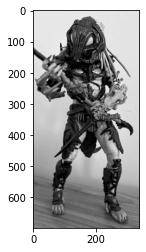

In [6]:
# Cargar una imagen en modo monocromático (un canal)
img = cv.imread('fft_alfa_pred.png',cv.IMREAD_GRAYSCALE)

# Como lucen los datos en un np.array
print(img.shape)

# Dimensión de la imagen
print(f'Tamaño imagen: {img.shape} pix')
#print(img)

plt.imshow(img,cmap='gray')
plt.show()

In [7]:
sigmas=np.array(range(4))*2+1
k_sizes=np.array(range(4,10))*2+1
h,w=img.shape



In [8]:
fig, ax = plt.subplots(len(sigmas)*len(k_sizes), 2, figsize=(2**5-1,500))
counter=0
for sigma in sigmas:
  for k_size in k_sizes:
    kernel, kernel_tf = create_gauss_filter(h, w, k_size=k_size, sigma=sigma)    

    ax[counter][0].title.set_text(f"Filtro Gaussiano k_size={k_size} sigma={sigma}")
    ax[counter][0].axis('off')
    ax[counter][0].imshow(kernel, cmap='jet')

    ax[counter][1].title.set_text("FFT del kernel")
    ax[counter][1].axis('off')
    ax[counter][1].imshow(np.abs(kernel_tf), cmap='jet')
    counter+=1
plt.tight_layout()
plt.show()

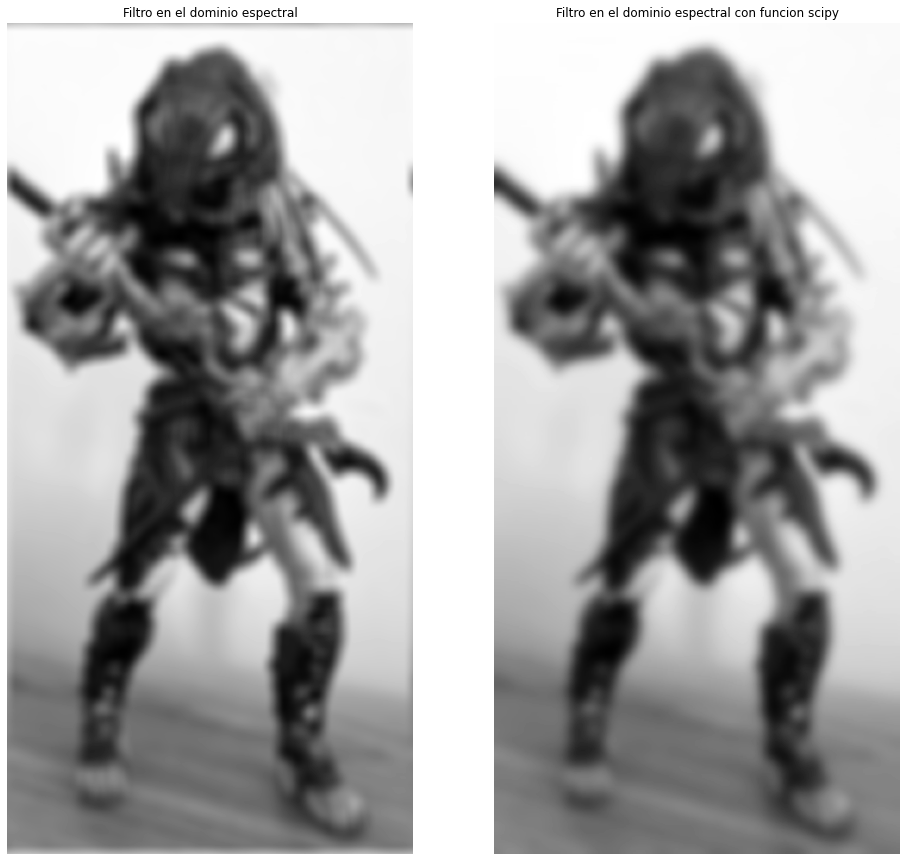

In [9]:
k_size = 15
sigma = 5

filter, fft = create_gauss_filter(h, w, k_size, sigma)

# Calculamos transformada
shifted_fft = np.fft.fftshift(np.fft.fft2(img))   
filtered = shifted_fft * fft        

# Inversa
f_ishift = np.fft.ifftshift(filtered)
imgGauss = np.real(np.fft.ifft2(f_ishift)) 
imgGauss = np.fft.ifftshift(imgGauss)

# Graficos
fig, ax = plt.subplots(1,2,figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(imgGauss, cmap='gray')
plt.title("Filtro en el dominio espectral")
plt.axis('off')



result = gaussian_filter(img, sigma=5)

plt.subplot(1,2,2)
plt.imshow(result, cmap='gray')
plt.title("Filtro en el dominio espectral con funcion scipy")
plt.axis('off')


plt.show()  





#Image Sharpness Measure for Blurred Images in Frequency Domain

Input: Image I of size M×N.\
Output: Image Quality measure (FM) where FM stands for Frequency Domain Image Blur Measure

Step 1: Compute F which is the Fourier Transform representation of image I

Step 2: Find Fc which is obtained by shifting the origin of F to centre.

Step 3: Calculate AF = abs (Fc) where AF is the absolute value of the centered Fourier transform of image I.

Step 4: Calculate M = max (AF) where M is the maximum value of the frequency component in F.

Step 5: Calculate TH = the total number of pixels in F whose pixel value > thres, where thres = M/1000.

Step 6: Calculate Image Quality measure (FM) from equation (1).

In [10]:
def IMGQualityMeasure(img):
  #1 
  F=np.fft.fft(img)
  #2 fftshift, la lleva al origen
  Fc=np.fft.ifftshift(F)
  #3
  AF=np.abs(Fc)
  #4
  M=np.max(AF)
  #5
  thres=M/1000
  TH=len(F[F>thres])
  #6
  FM=TH/(M*img.shape[1])

  return FM

In [11]:
print(IMGQualityMeasure(img),IMGQualityMeasure(imgGauss))

0.0025702151718988305 0.0005330858966510491


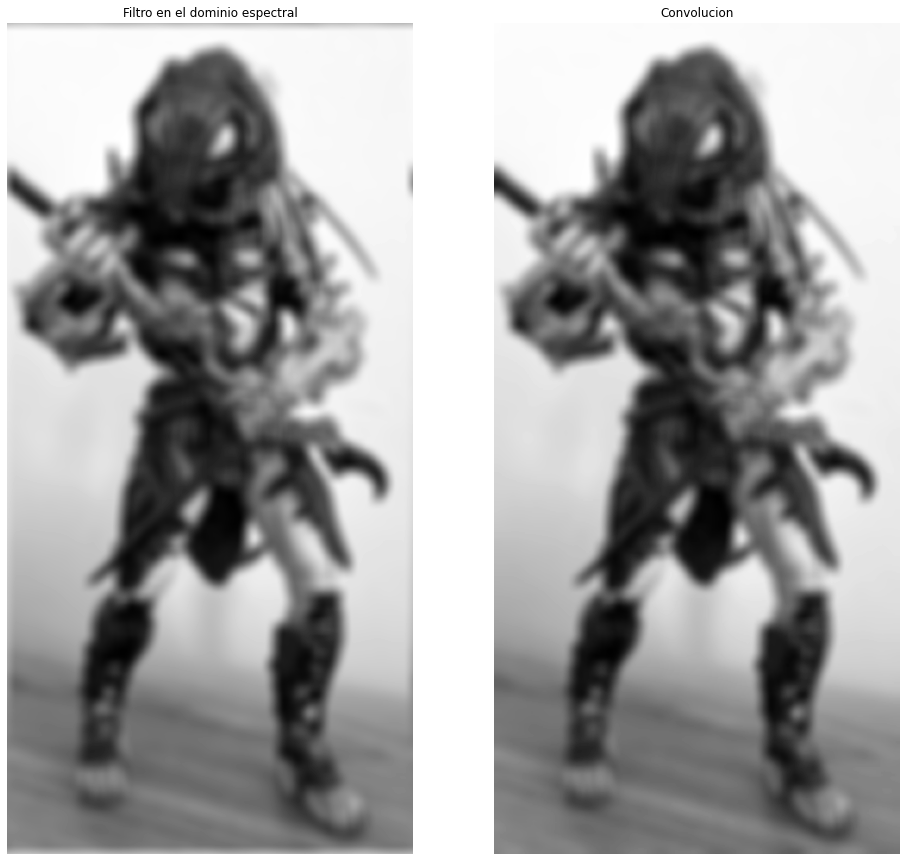

In [12]:
imgConv = cv.GaussianBlur(img, ksize=(k_size, k_size),sigmaX=sigma, sigmaY=sigma)

# Graficos
fig, ax = plt.subplots(1,2,figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(imgGauss, cmap='gray')
plt.title("Filtro en el dominio espectral")
plt.axis('off')



result = gaussian_filter(img, sigma=5)

plt.subplot(1,2,2)
plt.imshow(imgConv, cmap='gray')
plt.title("Convolucion")
plt.axis('off')


plt.show()  


In [26]:
sigmas=np.array(range(2,40))/10
qualitiesConv=[]
qualitiesSpec=[]
#qualities.append(IMGQualityMeasure(img))
for sigma in sigmas:
  imgConv = cv.GaussianBlur(img, ksize=(k_size, k_size),sigmaX=sigma, sigmaY=sigma)
  qualitiesConv.append(IMGQualityMeasure(imgConv))

  filter, fft = create_gauss_filter(h, w, k_size, sigma)

  # Calculamos transformada
  shifted_fft = np.fft.fftshift(np.fft.fft2(img))   
  filtered = shifted_fft * fft        

  # Inversa
  f_ishift = np.fft.ifftshift(filtered)
  imgGauss = np.real(np.fft.ifft2(f_ishift)) 
  imgGauss = np.fft.ifftshift(imgGauss)
  qualitiesSpec.append(IMGQualityMeasure(imgGauss))




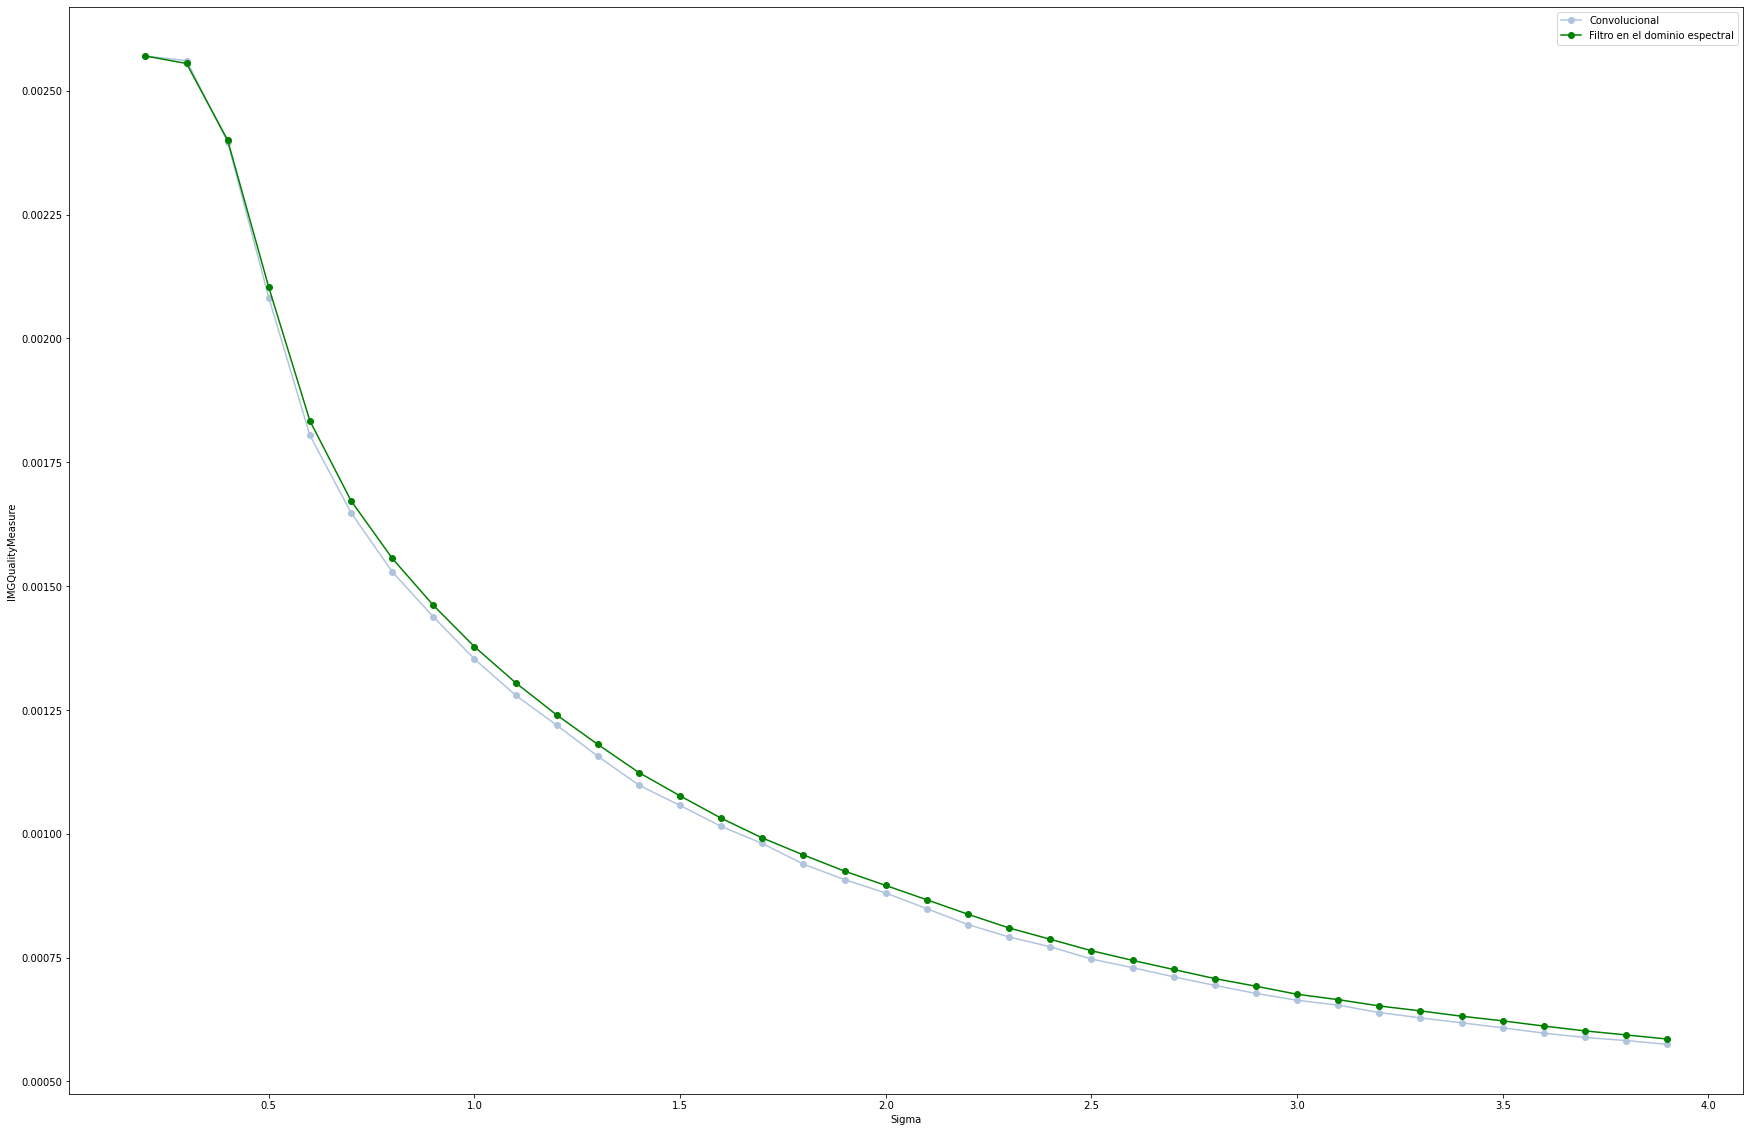

In [27]:
f, ax = plt.subplots()
#plt.rcParams['figure.figsize'] =30,20
plt.plot(sigmas,qualitiesConv,label='Convolucional',**{'color': 'lightsteelblue', 'marker': 'o'})
plt.plot(sigmas,qualitiesSpec,label='Filtro en el dominio espectral',**{'color': 'green', 'marker': 'o'})
ax.set_ylabel("IMGQualityMeasure")
ax.set_xlabel("Sigma")
ax.legend()

#Analysis of focus measure operators in shape-from-focus

In [28]:
#LAP2 Modified Laplacian

def LAP2(img):
    kernel = np.array([-1, 2, -1])
    laplacianX = np.abs(cv.filter2D(img, -1, kernel))
    laplacianY = np.abs(cv.filter2D(img, -1, kernel.T))
    return np.mean(laplacianX + laplacianY)



In [33]:
sigmas=np.array(range(2,40))/10
qualitiesConv=[]
qualitiesSpec=[]
#qualities.append(IMGQualityMeasure(img))
for sigma in sigmas:
  imgConv = cv.GaussianBlur(img, ksize=(k_size, k_size),sigmaX=sigma, sigmaY=sigma)
  qualitiesConv.append(LAP2(imgConv))

  filter, fft = create_gauss_filter(h, w, k_size, sigma)

  # Calculamos transformada
  shifted_fft = np.fft.fftshift(np.fft.fft2(img))   
  filtered = shifted_fft * fft        

  # Inversa
  f_ishift = np.fft.ifftshift(filtered)
  imgGauss = np.real(np.fft.ifft2(f_ishift)) 
  imgGauss = np.fft.ifftshift(imgGauss)
  qualitiesSpec.append(LAP2(imgGauss))




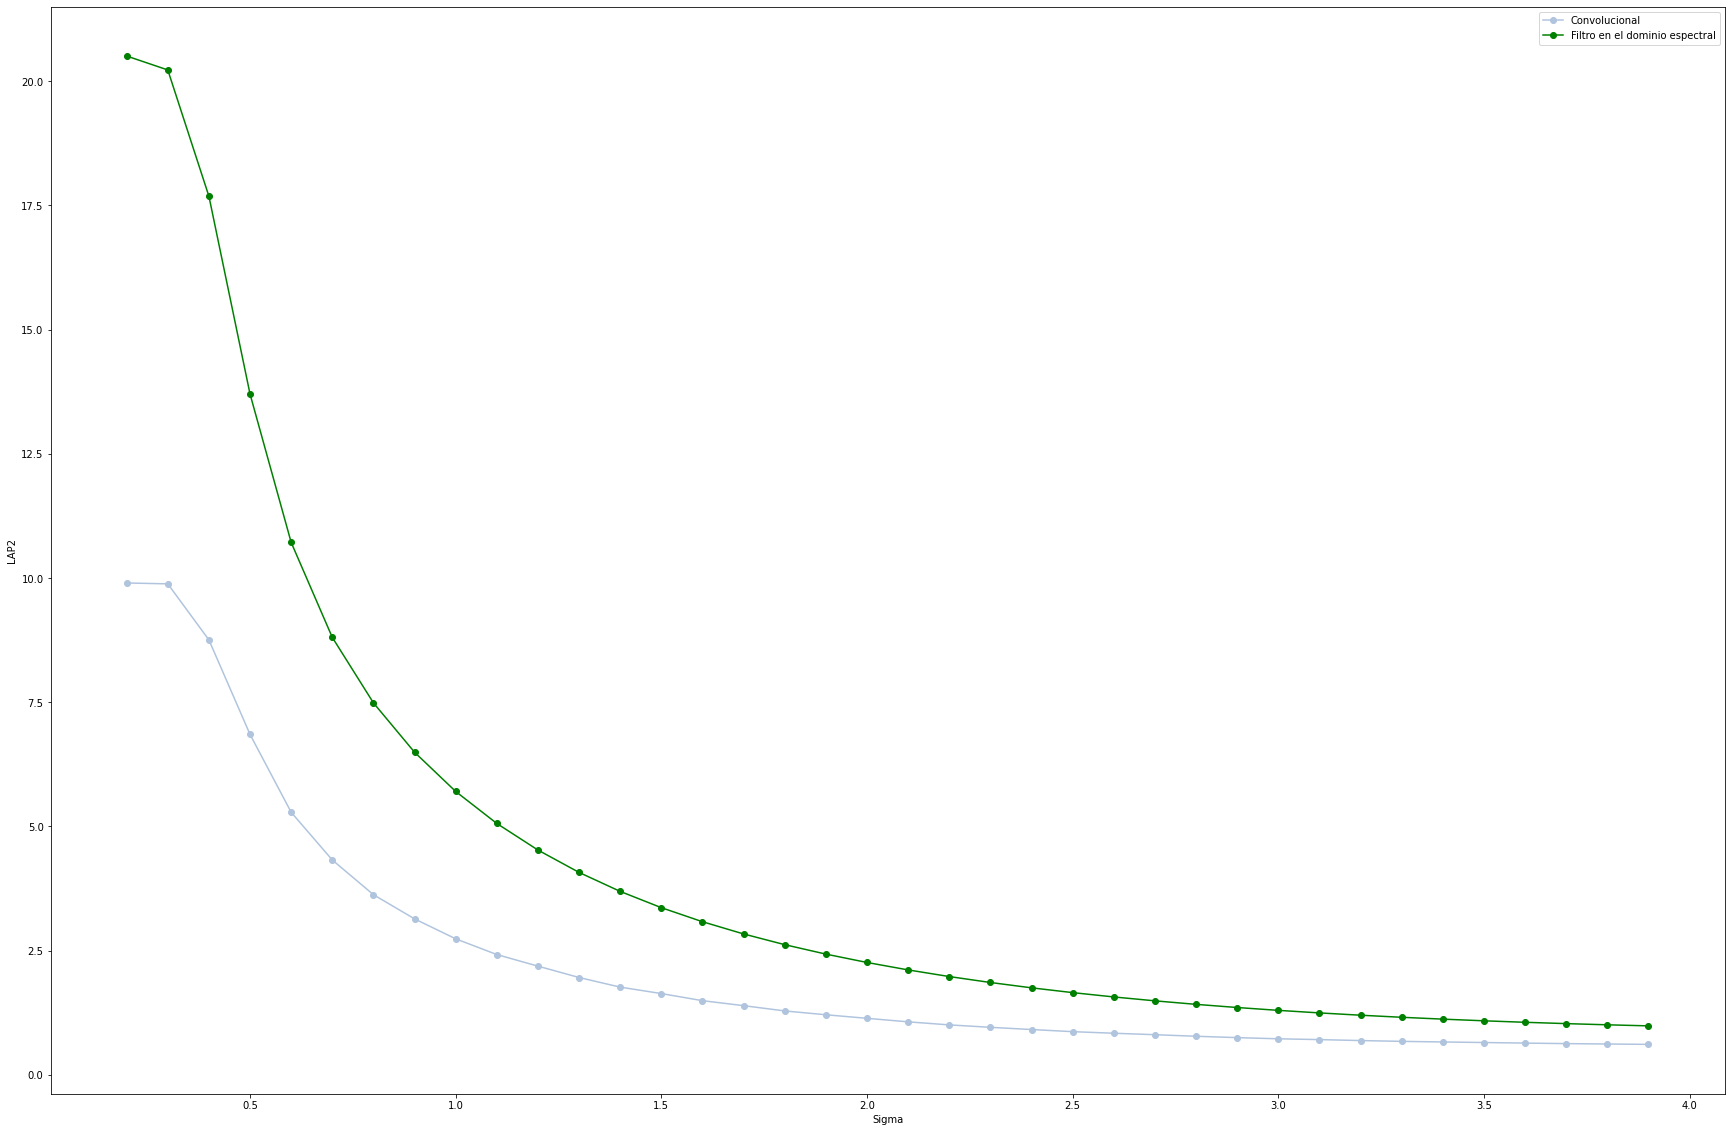

In [35]:
f, ax = plt.subplots()
#plt.rcParams['figure.figsize'] =30,20
plt.plot(sigmas,qualitiesConv,label='Convolucional',**{'color': 'lightsteelblue', 'marker': 'o'})
plt.plot(sigmas,qualitiesSpec,label='Filtro en el dominio espectral',**{'color': 'green', 'marker': 'o'})
ax.set_ylabel("LAP2")
ax.set_xlabel("Sigma")
ax.legend()